# Color and spaces

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

In [2]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [3]:
len(flags)

274

In [4]:
flags[40]

'COLOR_BGR2HLS'

In [7]:
nemo = cv2.imread('nemo0.jpg')
nemo

array([[[ 91, 131, 103],
        [ 86, 126, 101],
        [ 75, 118,  97],
        ...,
        [ 47,  86,  41],
        [ 47,  83,  39],
        [ 44,  80,  36]],

       [[ 90, 129, 103],
        [ 87, 127, 102],
        [ 78, 119,  98],
        ...,
        [ 52,  90,  48],
        [ 50,  88,  46],
        [ 47,  85,  43]],

       [[ 91, 127, 103],
        [ 87, 126, 104],
        [ 79, 122, 101],
        ...,
        [ 55,  97,  56],
        [ 53,  95,  54],
        [ 52,  92,  51]],

       ...,

       [[  9,  82, 120],
        [  5,  78, 116],
        [  2,  72, 112],
        ...,
        [  0,  30,  19],
        [  0,  30,  19],
        [  0,  30,  19]],

       [[  6,  71, 115],
        [  3,  68, 112],
        [  0,  65, 110],
        ...,
        [  0,  28,  19],
        [  0,  28,  19],
        [  0,  28,  19]],

       [[  0,  53, 102],
        [  0,  55, 104],
        [  0,  61, 109],
        ...,
        [  0,  26,  20],
        [  0,  26,  20],
        [  0,  26,  20]]

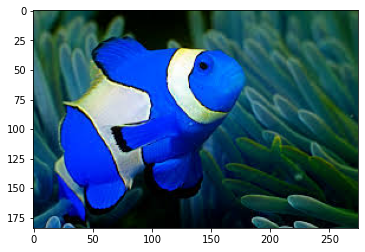

In [8]:
plt.imshow(nemo)

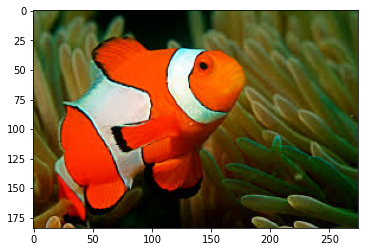

In [10]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

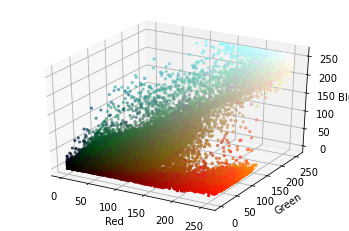

In [24]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel('Red')
axis.set_ylabel('Green')
axis.set_zlabel('Blue')
plt.show()

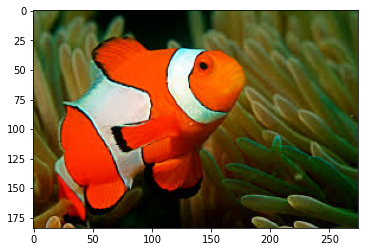

In [27]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
plt.imshow(nemo)
plt.show()

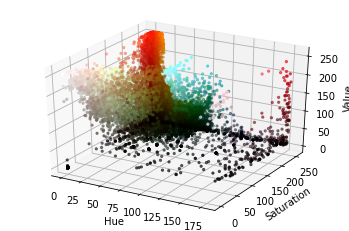

In [28]:
h, s, v= cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [32]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [33]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255

In [34]:
lo_square

array([[[0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373]],

       [[0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.74509804, 0.78431373]],

       [[0.00392157, 0.74509804, 0.78431373],
        [0.00392157, 0.7450980

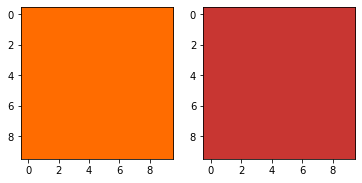

In [35]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [39]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
mask.shape

(184, 275)

In [41]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)
result.shape

(184, 275, 3)

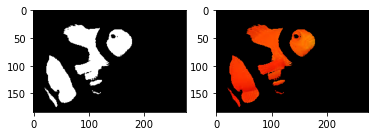

In [44]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [109]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

In [110]:
lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255

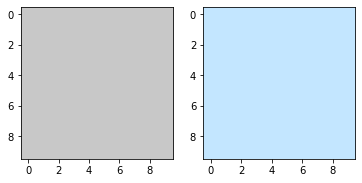

In [111]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

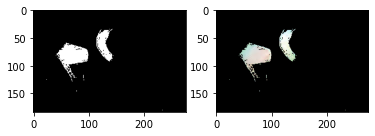

In [112]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

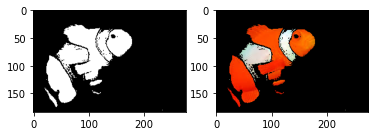

In [113]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask = final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap = "gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

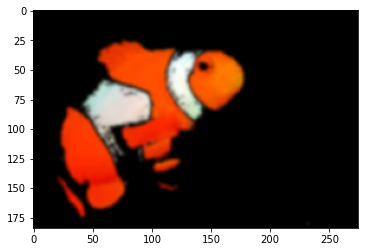

In [114]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

In [115]:
path = "./images/nemo"

nemos_friends = []
for i in range(6):
    friend = cv2.cvtColor(cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB)
    nemos_friends.append(friend)

In [120]:
def segment_fish(image):
    """Attemps to segment the clownfish out of the provided image"""
    
    #Convert the image into HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    #Set orange range
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)
    
    #Apply the orange mask
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)
    
    #Set a white range
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)
    
    #Apply the white mask
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)
     
    #Conbine two masks
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask = final_mask)
    
    #Clean up segmentation using a blur
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur

results = [segment_fish(friend) for friend in nemos_friends]

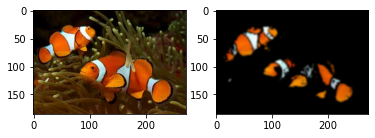

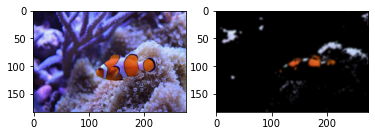

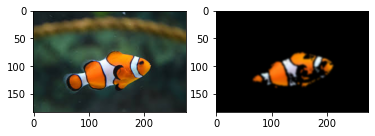

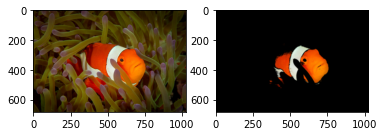

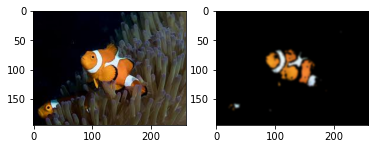

In [121]:
for i in range(1, 6):
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()